Сreating a graph of the dependence of detection probability on bit depth.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

File conf_matrix/conf_matrix_6q2.npy not found.
File conf_matrix/conf_matrix_6q3.npy not found.
File conf_matrix/conf_matrix_6q4.npy not found.
File conf_matrix/conf_matrix_6q5.npy not found.
File conf_matrix/conf_matrix_6q6.npy not found.
File conf_matrix/conf_matrix_6q7.npy not found.
File conf_matrix/conf_matrix_6q8.npy not found.
File conf_matrix/conf_matrix_6q9.npy not found.
File conf_matrix/conf_matrix_6q10.npy not found.
File conf_matrix/conf_matrix_6q11.npy not found.
File conf_matrix/conf_matrix_6q12.npy not found.
File conf_matrix/conf_matrix_6q13.npy not found.
File conf_matrix/conf_matrix_6q14.npy not found.
File conf_matrix/conf_matrix_6q15.npy not found.
File conf_matrix/conf_matrix_6q16.npy not found.


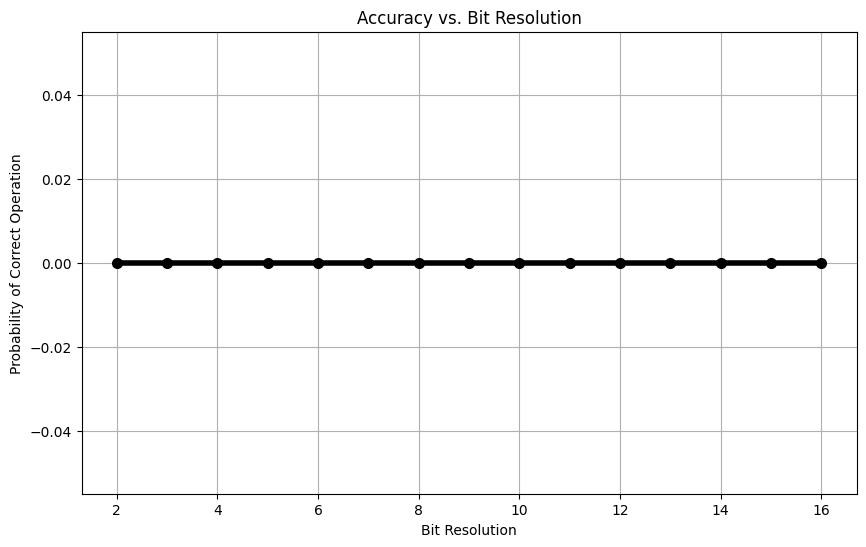

In [3]:
def calculate_accuracy(conf_matrix):
    """
    Calculate the accuracy of predictions based on a confusion matrix.
    """
    # Calculating the sum of correct predictions
    correct_predictions = np.trace(conf_matrix)
    
    # Calculating the sum total predictions
    total_predictions = conf_matrix.sum()
    
    # Calculating the probability of correct operation
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    return accuracy

bit_resolutions = list(range(2, 17))  
accuracies = []

for q_bits in bit_resolutions:
    filename = f"conf_matrix/conf_matrix_6q{q_bits}.npy"  
    try:
        conf_matrix = np.load(filename)

        accuracy = calculate_accuracy(conf_matrix)

        accuracies.append(accuracy)
        
        print(f"Bit resolution {q_bits}: Probability of correct operation = {accuracy:.4f}")
    except FileNotFoundError:
        print(f"File {filename} not found.")
        accuracies.append(0)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(bit_resolutions, accuracies, marker='o', color='black', linewidth=4, markersize=7)
plt.xlabel("Bit Resolution")
plt.ylabel("Probability of Correct Operation")
plt.title("Accuracy vs. Bit Resolution")
plt.grid()
plt.show()


Calculate the probability for each digit.

In [37]:
def calculate_row_probabilities(conf_matrix):
    """
    Calculate the probability for each cell in the confusion matrix.
    """
    row_sums = conf_matrix.sum(axis=1) 
    
    row_probability = np.zeros_like(conf_matrix, dtype=float)
    
    for i in range(conf_matrix.shape[0]):
        row_probability[i] = (conf_matrix[i] / row_sums[i]) * 100
    
    return row_probability

conf_matrix = np.load("conf_matrix_6q14.npy")  

row_percentages = calculate_row_probabilities(conf_matrix)
print("Confusion matrix with probabilities:")

column_width = 8
for row in row_percentages:
    formatted_row = ["{:.2f}".format(value).rjust(column_width) for value in row]  
    print("".join(formatted_row))


Confusion matrix with probabilities:
   98.37    0.00    0.20    0.20    0.00    0.20    0.82    0.10    0.10    0.00
    0.00   97.80    0.35    0.35    0.00    0.09    0.35    0.18    0.88    0.00
    1.36    0.29   89.05    0.97    1.45    0.39    1.16    1.26    3.29    0.78
    0.20    0.00    2.08   91.49    0.10    2.18    0.30    0.89    1.68    1.09
    0.20    0.31    0.31    0.10   94.09    0.00    1.12    0.20    0.41    3.26
    1.12    0.34    0.45    3.81    1.35   85.87    1.79    1.23    3.25    0.78
    1.15    0.31    0.42    0.21    0.84    1.36   95.51    0.10    0.10    0.00
    0.29    0.58    2.43    0.49    0.78    0.00    0.00   93.00    0.39    2.04
    0.41    0.51    0.51    1.85    0.92    2.05    1.13    1.64   90.76    0.21
    1.19    0.50    0.30    1.19    2.68    1.19    0.00    1.59    1.09   90.29


Creating a graph of hardware costs versus bit resolution.

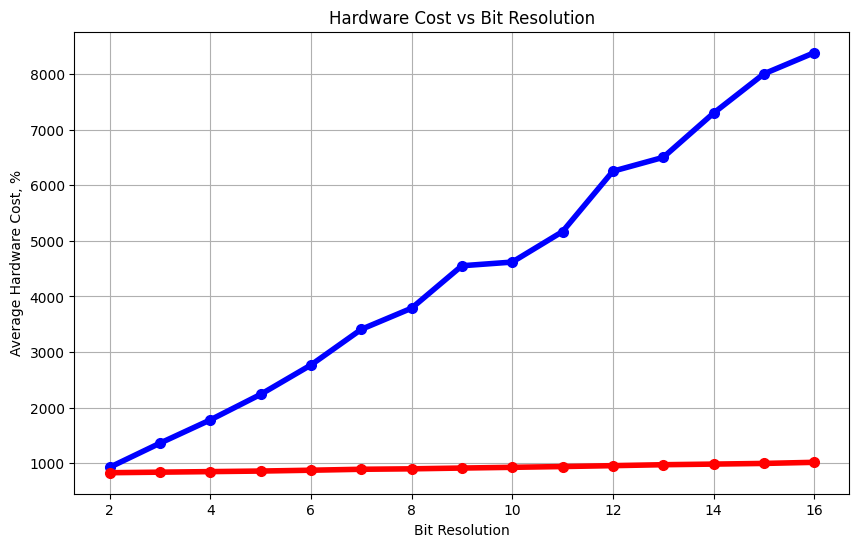

In [81]:
bit_resolutions = list(range(2, 17))
hardware_costs_lut = [929, 1363, 1781, 2240, 2768, 3409, 3789, 4552, 4618, 5166, 6251, 6500, 7295, 8001, 8381]
hardware_costs_ff = [832, 842, 852, 862, 877, 894, 902, 916, 929, 943, 959, 976, 987, 999, 1019 ]
hardware_costs = []

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(bit_resolutions, hardware_costs_lut, marker='o', color='blue', linewidth=4, markersize=7)
plt.plot(bit_resolutions, hardware_costs_ff, marker='o', color='red', linewidth=4, markersize=7)
plt.xlabel("Bit Resolution")
plt.ylabel("Hardware Cost")
plt.title("Hardware Cost vs Bit Resolution")
plt.grid()
plt.show()


# Final graphic

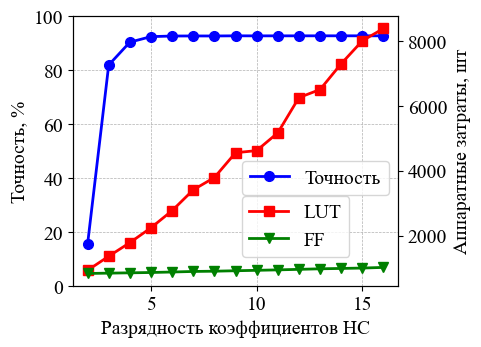

In [22]:
bit_resolutions = list(range(2, 17))
accuracies = []

for q_bits in bit_resolutions:
    conf_matrix_filename = f"../../bit_files_v3/experiment_results/conf_matrix_6q{q_bits}.npy"
    try:
        conf_matrix = np.load(conf_matrix_filename)
        accuracy = calculate_accuracy(conf_matrix) * 100
        accuracies.append(accuracy)
    except FileNotFoundError:
        print(f"File {conf_matrix_filename} not found.")
        accuracies.append(0)

hardware_costs_lut = [929, 1363, 1781, 2240, 2768, 3409, 3789, 4552, 4618, 5166, 6251, 6500, 7295, 8001, 8381]
hardware_costs_ff = [832, 842, 852, 862, 877, 894, 902, 916, 929, 943, 959, 976, 987, 999, 1019 ]

# Plotting
scale = 0.7
fig, ax1 = plt.subplots(figsize=(6*scale, 5*scale))
plt.rcParams.update({'font.size': 14, 'font.family': 'Times New Roman'})

# Plotting Accuracy on the primary y-axis
ax1.plot(bit_resolutions, accuracies, marker='o', color='blue', linewidth=2, markersize=7, label="Точность")
# ax1.set_xlabel("Bit Resolution")
ax1.set_xlabel("Разрядность коэффициентов НС")
# ax1.set_ylabel("Accuracy, %")
ax1.set_ylabel("Точность, %")
ax1.tick_params(axis='y')
ax1.set_ylim(0, 100)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plotting Hardware Costs on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(bit_resolutions, hardware_costs_lut, marker='s', color='red', linewidth=2, markersize=7, label="LUT")
ax2.plot(bit_resolutions, hardware_costs_ff, marker='v', color='green', linewidth=2, markersize=7, label="FF")
# ax2.set_ylabel("Hardware Cost, piece")
ax2.set_ylabel("Аппаратные затраты, шт")
ax2.tick_params(axis='y')

# Adding legends side by side
ax1.legend(loc="center right", bbox_to_anchor=(1.00, 0.40))
ax2.legend(loc="center right", bbox_to_anchor=(0.88, 0.22))

# plt.title("Accuracy and Hardware Cost vs Bit Resolution")

# plt.savefig("result.png", dpi=200, bbox_inches='tight', pad_inches=0.1)
# plt.show()

image_name = '../../../Publication/ITS_2024/Figures/Acc_LUTs_FFs.jpg'
fig.savefig(image_name, format='jpg', dpi=200, bbox_inches='tight', pad_inches = 0.1)